# ** YOLO_v1 **

* YOLO는 객체 검출(Object Detection)의 대표적인 방법 중 하나
* 워싱턴대 대학원생 Joseph Redmon이 개발
<br>
<br>

https://www.analyticsvidhya.com/blog/2020/08/playing-with-yolo-v1-on-google-colab/

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Cloning 'Darknet'

In [2]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5937, done.
remote: Total 5937 (delta 0), reused 0 (delta 0), pack-reused 5937
Receiving objects: 100% (5937/5937), 6.35 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (3925/3925), done.


# II. Change Directory

In [3]:
import os

os.chdir('/content/darknet')

In [4]:
!pwd

/content/darknet


# III. Install 'Darknet'

In [5]:
!make 

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

# IV. Download Pretrained 'weights'

In [6]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

--2021-08-06 04:15:08--  http://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/yolov1/yolov1.weights [following]
--2021-08-06 04:15:08--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights’

yolov1.weights      100%[===================>] 752.75M  39.3MB/s    in 20s     

2021-08-06 04:15:29 (37.8 MB/s) - ‘yolov1.weights’ saved [789312988/789312988]



# V. Object Detection with Images

> ## 1) dog.jpg

In [7]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/data/dog.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

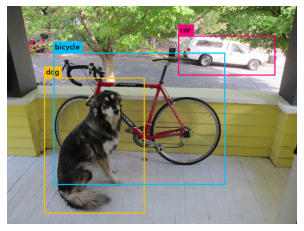

In [8]:
import cv2
import matplotlib.pyplot as plt
import os.path


fig,ax = plt.subplots()
ax.tick_params(labelbottom = 'off', bottom = 'off')
ax.tick_params(labelleft = 'off', left = 'off')
ax.set_xticklabels([])
ax.axis('off')

file = '/content/darknet/predictions.jpg'

if os.path.exists(file):
    img = cv2.imread(file)
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(show_img)

> ## 2) kite.jpg

In [9]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/data/kite.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

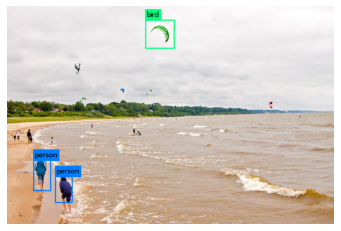

In [10]:
fig,ax = plt.subplots()
ax.tick_params(labelbottom = 'off', bottom = 'off')
ax.tick_params(labelleft = 'off', left = 'off')
ax.set_xticklabels([])
ax.axis('off')

file = '/content/darknet/predictions.jpg'

if os.path.exists(file):
    img = cv2.imread(file)
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(show_img)

# VI. Fast YOLO Model

> ## 1) Download 'tyny-yolov1.weights'

In [11]:
!wget http://pjreddie.com/media/files/yolov1/tiny-yolov1.weights

URL transformed to HTTPS due to an HSTS policy
--2021-08-06 04:15:55--  https://pjreddie.com/media/files/yolov1/tiny-yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108399816 (103M) [application/octet-stream]
Saving to: ‘tiny-yolov1.weights’

tiny-yolov1.weights 100%[===================>] 103.38M  33.6MB/s    in 3.1s    

2021-08-06 04:15:59 (33.6 MB/s) - ‘tiny-yolov1.weights’ saved [108399816/108399816]



> ## 2) person.jpg

In [12]:
!./darknet yolo test /content/darknet/cfg/yolov1-tiny.cfg /content/darknet/tiny-yolov1.weights /content/darknet/data/person.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   448 x 448 x   3   ->   448 x 448 x  16  0.173 BFLOPs
    1 max          2 x 2 / 2   448 x 448 x  16   ->   224 x 224 x  16
    2 conv     32  3 x 3 / 1   224 x 224 x  16   ->   224 x 224 x  32  0.462 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  32   ->   112 x 112 x  32
    4 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64  0.462 BFLOPs
    5 max          2 x 2 / 2   112 x 112 x  64   ->    56 x  56 x  64
    6 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128  0.462 BFLOPs
    7 max          2 x 2 / 2    56 x  56 x 128   ->    28 x  28 x 128
    8 conv    256  3 x 3 / 1    28 x  28 x 128   ->    28 x  28 x 256  0.462 BFLOPs
    9 max          2 x 2 / 2    28 x  28 x 256   ->    14 x  14 x 256
   10 conv    512  3 x 3 / 1    14 x  14 x 256   ->    14 x  14 x 512  0.462 BFLOPs
   11 max          2 x 2 / 2    14 x  14 x 512   ->     7 x   7 x 512
   12 con

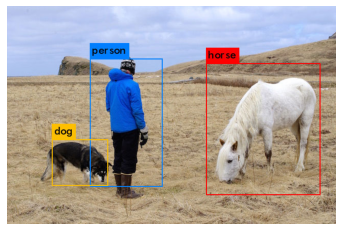

In [13]:
fig,ax = plt.subplots()
ax.tick_params(labelbottom = 'off', bottom = 'off')
ax.tick_params(labelleft = 'off', left = 'off')
ax.set_xticklabels([])
ax.axis('off')

file = '/content/darknet/predictions.jpg'

if os.path.exists(file):
    img = cv2.imread(file)
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(show_img)

# 
# 
# 
# The End
# 
# 
# 